# Viraj Nishesh Darji

## Reading file and doing basic EDA

In [1]:
import pandas as pd

In [2]:
sms = pd.read_table('SMSSpamCollection', header=None)
sms.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
sms.describe()

,0,1
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
y = sms[0]
y.value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

Using LabelEncoder we can setting spam and ham (no spam) to 0 and 1.

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [6]:
import matplotlib as plt
import seaborn as sns
sms.columns=['label', 'msg']
sms["length"] = sms["msg"].apply(len)
sms.head()

,label,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


C:\Users\VIRAJ\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length'>

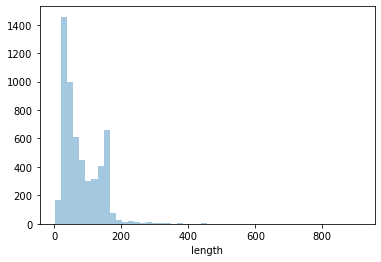

In [7]:
sns.distplot(sms["length"], kde=False)

# Text Pre-processing

Contraction Mapping/ Expanding Contraction

It means it converts shortened form of word like I'll to I will. It helps in standardizing the text.

In [8]:
import contractions

In [9]:
sms['no_contract'] = sms['msg'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [10]:
sms["msg_str"] = [' '.join(map(str, l)) for l in sms['no_contract']]
sms.head()

,label,msg,length,no_contract,msg_str
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,"[YOU, dun, say, so, early, hor..., YOU, c, alr...",YOU dun say so early hor... YOU c already then...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar..."


Tokenization

Tokenization is breaking text into smaller parts, that smaller parts are called tokens, tokens can be words or sentences. It helps in understanding meaning of the text by analyizing tokens.
https://towardsdatascience.com/tokenization-for-natural-language-processing-a179a891bad4

In [11]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
sms['tokenized'] = sms['msg_str'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VIRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
sms.head()

,label,msg,length,no_contract,msg_str,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,"[YOU, dun, say, so, early, hor..., YOU, c, alr...",YOU dun say so early hor... YOU c already then...,"[YOU, dun, say, so, early, hor, ..., YOU, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,..."


Noise Cleaning

It removes special character and punctuations which does not have any significant meaning are considered as noise and can be removed. It depends on use case to use case what should be considered as noise.

In [13]:
sms['lower'] = sms['tokenized'].apply(lambda x: [word.lower() for word in x])

In [14]:
import string
punc = string.punctuation
sms['no_punc'] = sms['lower'].apply(lambda x: [word for word in x if word not in punc])
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, crazy, .., availabl..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,"[YOU, dun, say, so, early, hor..., YOU, c, alr...",YOU dun say so early hor... YOU c already then...,"[YOU, dun, say, so, early, hor, ..., YOU, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he..."


Spell Checking

Usually data can have many spelling mistakes. Its better to fix all the spelling mistakes.

In [15]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

happening
{'penning', 'henning', 'happening'}


In [ ]:
sms.head()

Removing Stopwords.

Stopwords are commonly occuring words which doesnot have much significance, therefore removing them.

In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
sms['stopwords_removed'] = sms['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
sms.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc,stopwords_removed
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, crazy, .., availabl...","[go, jurong, point, crazy, .., available, bugi..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[YOU, dun, say, so, early, hor..., YOU, c, alr...",YOU dun say so early hor... YOU c already then...,"[YOU, dun, say, so, early, hor, ..., YOU, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]"


POS tagging and Lemmatization

POS Tagging is a processing of assigning part of speech to each word in a sentence. It helps in understanding grammatical structure and meaning of text. For doing lemmatization we need to do POS Tagging and POS tag should be in wordnet format.

Stemming and Lemmatization are methods to reduce words to their base form. In stemming the resuling base form word we get may not be lexicographically correct, while in lemmatization the words will be lexicographically correct. There stemming is faster and lemmtization is more accurate, it depends on use case what you want to use.

In [18]:
#POS Tagging
nltk.download('averaged_perceptron_tagger')
sms['pos_tags'] = sms['stopwords_removed'].apply(nltk.tag.pos_tag)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\VIRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [19]:
#converting in pos tag to wordnet format
nltk.download('wordnet') 
from nltk.corpus import wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
sms['wordnet_pos'] = sms['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
sms.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VIRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, crazy, .., availabl...","[go, jurong, point, crazy, .., available, bugi...","[(go, VB), (jurong, JJ), (point, NN), (crazy, ...","[(go, v), (jurong, a), (point, n), (crazy, n),..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]","[(ok, JJ), (lar, NN), (..., :), (joking, VBG),...","[(ok, a), (lar, n), (..., n), (joking, v), (wi..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(free, JJ), (entry, NN), (2, CD), (wkly, JJ),...","[(free, a), (entry, n), (2, n), (wkly, a), (co..."
3,ham,U dun say so early hor... U c already then say...,49,"[YOU, dun, say, so, early, hor..., YOU, c, alr...",YOU dun say so early hor... YOU c already then...,"[YOU, dun, say, so, early, hor, ..., YOU, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]","[(dun, NNS), (say, VBP), (early, JJ), (hor, NN...","[(dun, n), (say, v), (early, a), (hor, n), (....."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]","[(nah, RB), (think, NN), (goes, VBZ), (usf, JJ...","[(nah, r), (think, n), (goes, v), (usf, a), (l..."


In [20]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
sms['lemmatized'] = sms['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, crazy, .., availabl...","[go, jurong, point, crazy, .., available, bugi...","[(go, VB), (jurong, JJ), (point, NN), (crazy, ...","[(go, v), (jurong, a), (point, n), (crazy, n),...","[go, jurong, point, crazy, .., available, bugi..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]","[(ok, JJ), (lar, NN), (..., :), (joking, VBG),...","[(ok, a), (lar, n), (..., n), (joking, v), (wi...","[ok, lar, ..., joke, wif, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(free, JJ), (entry, NN), (2, CD), (wkly, JJ),...","[(free, a), (entry, n), (2, n), (wkly, a), (co...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[YOU, dun, say, so, early, hor..., YOU, c, alr...",YOU dun say so early hor... YOU c already then...,"[YOU, dun, say, so, early, hor, ..., YOU, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]","[(dun, NNS), (say, VBP), (early, JJ), (hor, NN...","[(dun, n), (say, v), (early, a), (hor, n), (.....","[dun, say, early, hor, ..., c, already, say, ...]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]","[(nah, RB), (think, NN), (goes, VBZ), (usf, JJ...","[(nah, r), (think, n), (goes, v), (usf, a), (l...","[nah, think, go, usf, life, around, though]"


# Word Embedding

Word Embedding are techniques which represents indibidual words as real-valued vector, where similar words will have similar words will have similar vector representation.

### Bag of Words

Bag of Words is one of the popular word embedding technique. Each valued vector would represents count of words in a text. It does not contain information on the grammer or the order of the words.

In [105]:
sms['join_lemmatized']=sms['lemmatized'].map(' '.join)

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sms['label'], sms['join_lemmatized'], test_size=0.3, stratify=sms['label'], random_state=42)

since data is imbalanced, we are random oversampling the data, to balance the data.

In [128]:
# Split the data into train and test
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x,y = ros.fit_resample(x_train.array.reshape(-1, 1),y_train.array.reshape(-1, 1))

In [129]:
x=x.flatten()
y=y.flatten()
d={'label':x,'join_lemmatized':y}
df=pd.DataFrame(data=d,columns=['label','join_lemmatized'],index=None)

In [130]:
df

,label,join_lemmatized
0,spam,goal arsenal 4 henry 7 v liverpool 2 henry sco...
1,ham,say go snow start around 8 9 pm tonite predict...
2,ham,aah bless arm
3,ham,oh k. come tomorrow
4,ham,happen gotten job begin registration permanent...
...,...,...
84290,ham,… ‘ worry ‘ finish march … ish
84291,ham,… ‘ worry ‘ finish march … ish
84292,ham,… ‘ worry ‘ finish march … ish
84293,ham,… ‘ worry ‘ finish march … ish


In [131]:
x_test

160     spam
1690     ham
4647    spam
5090     ham
2286     ham
        ... 
2569     ham
3971     ham
1741    spam
3411     ham
1430    spam
Name: label, Length: 1672, dtype: object

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['join_lemmatized'])

In [134]:
bow = bow_transformer.transform(df['join_lemmatized'])
bow

<84295x6256 sparse matrix of type '<class 'numpy.int64'>'
	with 692093 stored elements in Compressed Sparse Row format>

### TF-IDF

Term Frequency-Inverse Document Frequency, it is a numerical statistic which shows how important a word is. </br>
Term Frequency-Stores the information on how frequent a word is in a particular document. </br>
Inverse Document Frequency-Store the information on how rare a word is in a document.</br>
IDF is given more importance than TF.

In [135]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(bow)

In [136]:
tfidf = tfidf_transformer.transform(bow)
tfidf

<84295x6256 sparse matrix of type '<class 'numpy.float64'>'
	with 692093 stored elements in Compressed Sparse Row format>

Training using Multinomial Naive Bayes

In [137]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(tfidf, df['label'])

Testing Data

In [138]:
test_bow = bow_transformer.transform(y_test)
test_tfidf = tfidf_transformer.transform(test_bow)
prediction = spam_detect_model.predict(test_tfidf)

In [139]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(x_test, prediction))

[[1441    7]
 [  22  202]]


In [141]:
print(classification_report(x_test, prediction))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       0.97      0.90      0.93       224

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



References:</br>
1. U. (n.d.). spam_ham_detection/spam_ham_classification.ipynb at master · ujjwalgupta07/spam_ham_detection. GitHub. https://github.com/ujjwalgupta07/spam_ham_detection </br>
2. Team, T. A. (2020, November 4). Natural Language Processing: Concepts and Workflow. Towards AI. https://towardsai.net/p/nlp/natural-language-processing-concepts-and-workflow-48083d2e3ce7 </br>
3. pos tagging nlp. (n.d.). Shiksha. https://www.google.com/amp/s/www.shiksha.com/online-courses/articles/pos-tagging-in-nlp/amp </br>
4. what are word embeddings. (n.d.). Machine Learning Mastery. https://machinelearningmastery.com/what-are-word-embeddings/ </br>
5. Word embeddings in NLP: A Complete Guide. (n.d.). Word Embeddings in NLP: A Complete Guide. https://www.turing.com/kb/guide-on-word-embeddings-in-nlp</br>
6. Chakravarthy, S. (2020, July 10). Tokenization for Natural Language Processing. Medium. https://towardsdatascience.com/tokenization-for-natural-language-processing-a179a891bad4 </br>